In [1]:
import numpy
import matplotlib.pyplot as plt
import ammonia_props
amm = ammonia_props.AmmoniaProps()

In [ ]:
0.8**20

In [ ]:
def bracket_p_min(x, p_low=0.002, p_high=0.2, max_iter=10):
    for i in range(max_iter):
        p = 0.5 * (p_low + p_high)
        try:
            state=amm.props2(x=x,P=p,Qu=0)
            # This p is valid, so reduce the upper bracket
            p_high = p
        except:
            # This p is invalid (too high), so set as lower bracket
            p_low = p
            
    return (p_low, p_high, state)

In [ ]:
x_range = numpy.linspace(0,1,1001)
p_min = numpy.empty_like(x_range)
p_min.fill(numpy.nan)
t_out = p_min.copy()
for i, x in enumerate(x_range):
    p_low, p_high, state = bracket_p_min(x)
    p_min[i] = p_low
    t_out[i] = state.T

In [ ]:
print(p_min.max())
p_above = p_min.max() * 1.1
t2 = amm.props2v(x=x_range,P=p_above,Qu=0,out='T')

In [ ]:
fig=plt.figure(figsize=(4,6))
ax1=fig.add_subplot(211)
#plt.xlabel('Ammonia mass fraction')
plt.ylabel('Minimum pressure (bar)\nbefore function fails')
plt.plot(x_range,p_min,'.')
ax2=fig.add_subplot(212,sharex=ax1)
#ax2 = ax1.twinx()
plt.xlabel('Ammonia mass fraction')
plt.ylabel('Temperature (K)\nof saturated liquid (Qu=0) ')
plt.plot(x_range,t_out,'.',label='At min pressure')
plt.plot(x_range,t2,'-',label='At p={:g} bar'.format(p_above))
plt.legend()
plt.show()

So, on my desktop, for any pressure no less than about 0.177957 bar, we can evaluate the liquid state for all x. But on the laptop, we can evaluate the function across the entire domain for any pressure down to about 0.00586719. That indicates a significant problem with evaluation on the desktop.

In [8]:
def bracket_p_max(x, p_low=0., p_high=2000., max_iter=10):
    for i in range(max_iter):
        p = 0.5 * (p_low + p_high)
        try:
            state=amm.props2(x=x,P=p,Qu=0)
            # This p is valid, so ... set as lower bracket
            p_low = p
        except:
            # This p is invalid (too high), reduce the upper bracket
            p_high = p
            
    return (p_low, p_high, state)

In [9]:
x_range = numpy.linspace(0,1,1001)
p_max = numpy.empty_like(x_range)
p_max.fill(numpy.nan)
t_out = p_max.copy()
for i, x in enumerate(x_range):
    p_low, p_high, state = bracket_p_max(x)
    p_max[i] = p_high
    t_out[i] = state.T

In [28]:
print(p_max.min())
p_below = p_max.min() * 0.9
t2 = amm.props2v(x=x_range,P=p_below,Qu=0,out='T')

89.84375


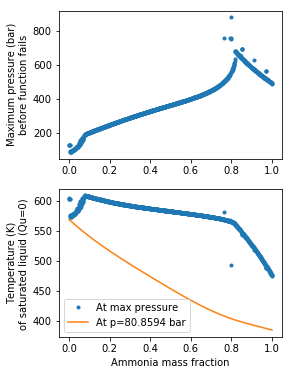

In [29]:
fig=plt.figure(figsize=(4,6))
ax1=fig.add_subplot(211)
#plt.xlabel('Ammonia mass fraction')
plt.ylabel('Maximum pressure (bar)\nbefore function fails')
plt.plot(x_range,p_max,'.')
ax2=fig.add_subplot(212,sharex=ax1)
#ax2 = ax1.twinx()
plt.xlabel('Ammonia mass fraction')
plt.ylabel('Temperature (K)\nof saturated liquid (Qu=0) ')
plt.plot(x_range,t_out,'.',label='At max pressure')
plt.plot(x_range,t2,'-',label='At p={:g} bar'.format(p_below))
plt.legend()
plt.show()